## Extract the Data

In [4]:
# Importing pandas library
import pandas as pd

# Load the CPI data
cpi_file_path = 'Resources/CPI.csv' 
cpi_df = pd.read_csv(cpi_file_path)

# Exploring the top 5 columns
cpi_df.head()


,DATE,CPILFESL
0,1971-08-01,43.0
1,1971-09-01,43.0
2,1971-10-01,43.1
3,1971-11-01,43.2
4,1971-12-01,43.3


In [5]:
# Undertsnading the structure of the data and datatypes
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      628 non-null    object 
 1   CPILFESL  628 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.9+ KB


In [8]:
# Converting the DATE column to a datetime format
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])

# Validating the conversion
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      628 non-null    datetime64[ns]
 1   CPILFESL  628 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.9 KB


In [9]:
# Resampling the data to get annual averages
annual_cpi_df = cpi_df.resample('Y', on='DATE').mean()

# Resetting the index to get 'DATE' as a column
annual_cpi_df.reset_index(inplace=True)

# Calculating Year-over-Year Inflation Rates
annual_cpi_df['Inflation Rate'] = annual_cpi_df['CPILFESL'].pct_change() * 100

# Displaying the first few rows to verify the changes
print(annual_cpi_df.head())

        DATE   CPILFESL  Inflation Rate
0 1971-12-31  43.120000             NaN
1 1972-12-31  44.041667        2.137446
2 1973-12-31  45.575000        3.481552
3 1974-12-31  49.358333        8.301335
4 1975-12-31  53.908333        9.218302


## Visualize the Data

<Axes: title={'center': 'Consumer Price Index for All Urban Consumers'}, xlabel='DATE'>

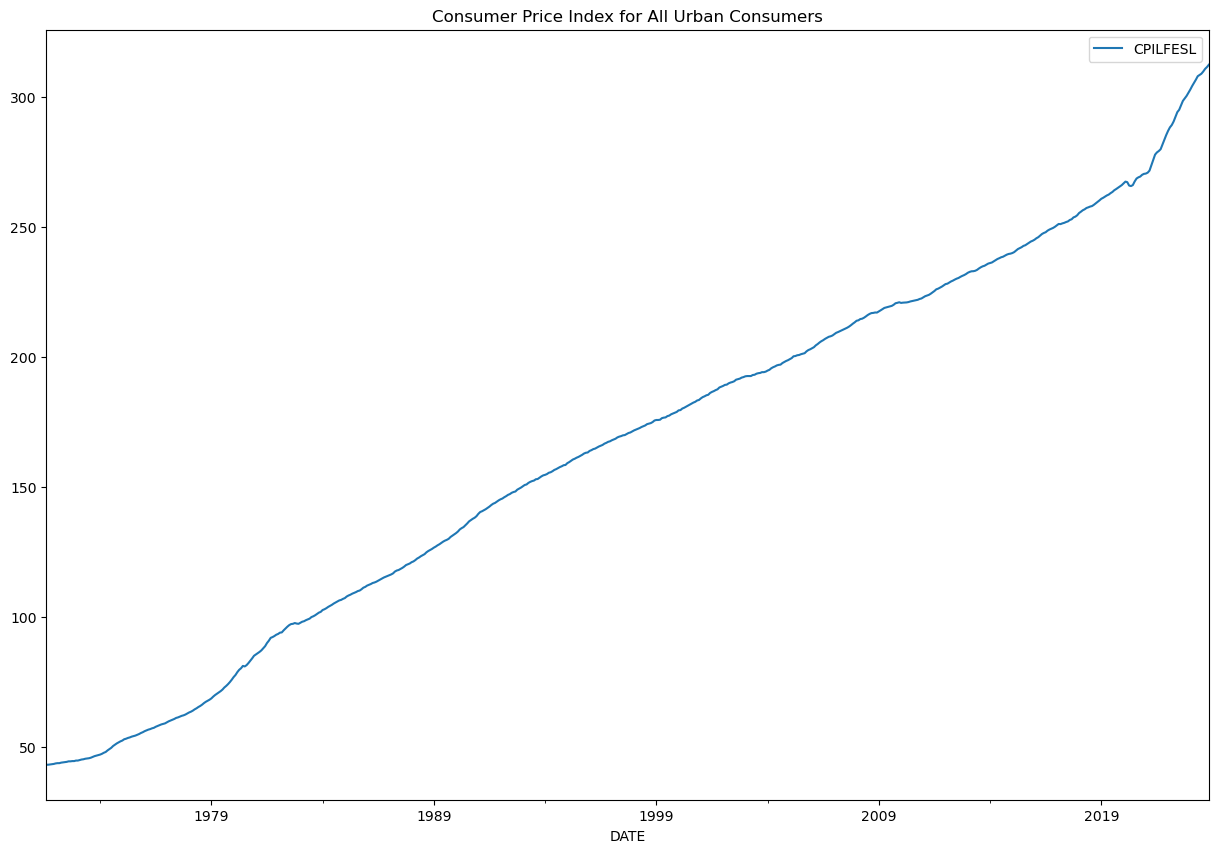

In [26]:
# Plotting the CPI data
cpi_df.plot(x='DATE', y='CPILFESL', title='Consumer Price Index for All Urban Consumers', figsize=(15,10))

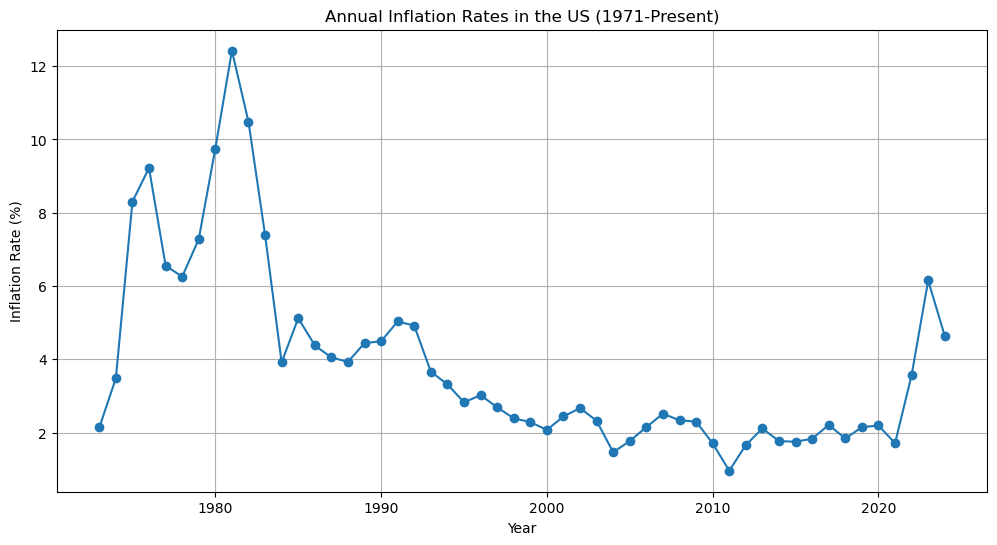

In [10]:
# Importing matplotlib for visualization
import matplotlib.pyplot as plt

# Plotting the inflation rates over the years
plt.figure(figsize=(12, 6))
plt.plot(annual_cpi_df['DATE'], annual_cpi_df['Inflation Rate'], marker='o')
plt.title('Annual Inflation Rates in the US (1971-Present)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()


In [11]:
# Identify years with exceptionally high or low inflation rates
high_inflation_years = annual_cpi_df[annual_cpi_df['Inflation Rate'] > annual_cpi_df['Inflation Rate'].quantile(0.9)]
low_inflation_years = annual_cpi_df[annual_cpi_df['Inflation Rate'] < annual_cpi_df['Inflation Rate'].quantile(0.1)]

print("High Inflation Years:\n", high_inflation_years)
print("\nLow Inflation Years:\n", low_inflation_years)


High Inflation Years:
          DATE   CPILFESL  Inflation Rate
3  1974-12-31  49.358333        8.301335
4  1975-12-31  53.908333        9.218302
8  1979-12-31  71.858333        9.749268
9  1980-12-31  80.783333       12.420271
10 1981-12-31  89.250000       10.480710
11 1982-12-31  95.850000        7.394958

Low Inflation Years:
          DATE    CPILFESL  Inflation Rate
32 2003-12-31  193.225000        1.461515
38 2009-12-31  219.236667        1.703237
39 2010-12-31  221.335833        0.957489
40 2011-12-31  225.006417        1.658377
43 2014-12-31  237.902333        1.750100
49 2020-12-31  267.704917        1.708696


In [12]:
import plotly.express as px

# Creating an interactive line plot
fig = px.line(annual_cpi_df, x='DATE', y='Inflation Rate', title='Annual Inflation Rates in the US (1971-Present)')
fig.show()


## Cleanse the Data for Prophet

In [15]:
!pip install prophet


  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/6b/3c/79d6da1af2a9bd6a534c5a283271eff1bdd673241cda795919a2b41578b3/prophet-1.1.5-py3-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/bd/77/3fa00dd747dfa9f1d89d53c60484eb3cbb5d32c94f57aecc64e0209e8e29/holidays-0.39-py3-none-any.whl.metadata
  Using cached holidays-0.39-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted

In [16]:
from prophet import Prophet

# Preparing data for Prophet
prophet_df = annual_cpi_df[['DATE', 'Inflation Rate']].rename(columns={'DATE': 'ds', 'Inflation Rate': 'y'})


## CPI Visualizations and Predictions with Prophet

In [32]:
# Preparing the CPI data for Prophet
cpi_prophet_df = cpi_df.rename(columns={'DATE': 'ds', 'CPILFESL': 'y'})
cpi_prophet_df['ds'] = pd.to_datetime(cpi_prophet_df['ds'])


In [33]:
# Initialize the Prophet model
cpi_model = Prophet()

# Fit the model with your dataframe
cpi_model.fit(cpi_prophet_df)


22:00:25 - cmdstanpy - INFO - Chain [1] start processing
22:00:25 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
# Create a dataframe for future predictions for the next 5 years
cpi_future = cpi_model.make_future_dataframe(periods=5 * 12, freq='M')

# Use the model to make predictions
cpi_forecast = cpi_model.predict(cpi_future)


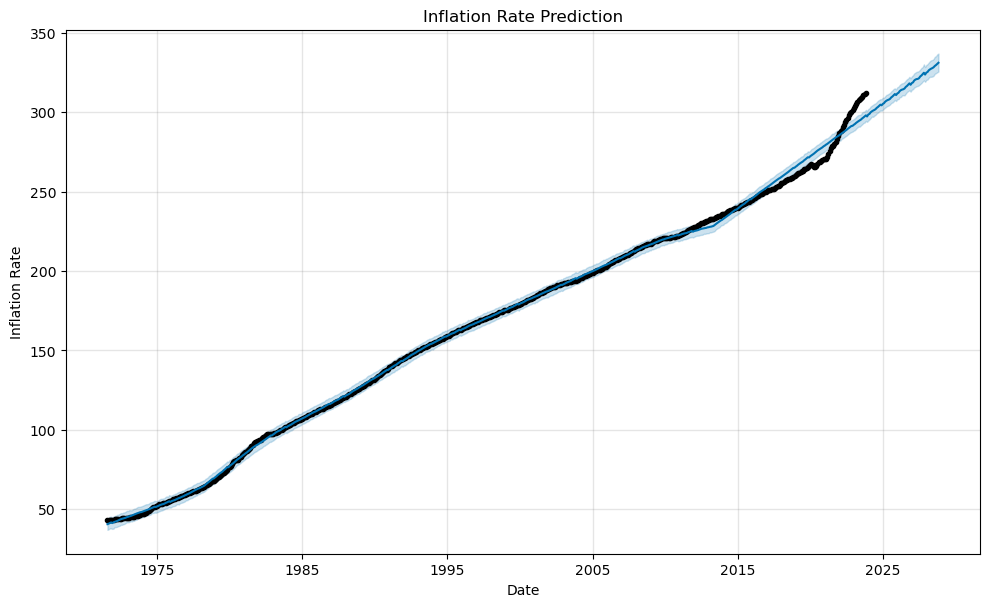

In [42]:
# Plot the forecast
cpi_model.plot(cpi_forecast, xlabel = 'Date', ylabel = 'Inflation Rate')
plt.title('Inflation Rate Prediction')
plt.show()


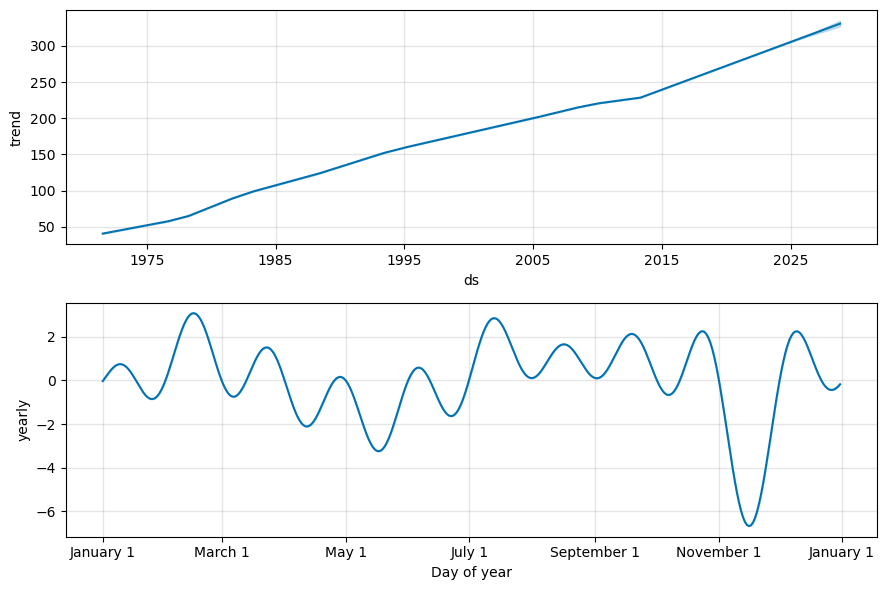

In [43]:
# Optionally, plot the forecast components
cpi_model.plot_components(cpi_forecast)
plt.show()

## Inflation Visualizations and Predictions with Prophet

In [40]:
# Initializing and fitting the model
inflation_model = Prophet(yearly_seasonality=True)
inflation_model.fit(prophet_df)

#Predicting the next 5 years of inflation rates
inflation_future = inflation_model.make_future_dataframe(periods=5, freq='Y')
inflation_forecast = inflation_model.predict(inflation_future)

22:03:07 - cmdstanpy - INFO - Chain [1] start processing
22:03:08 - cmdstanpy - INFO - Chain [1] done processing


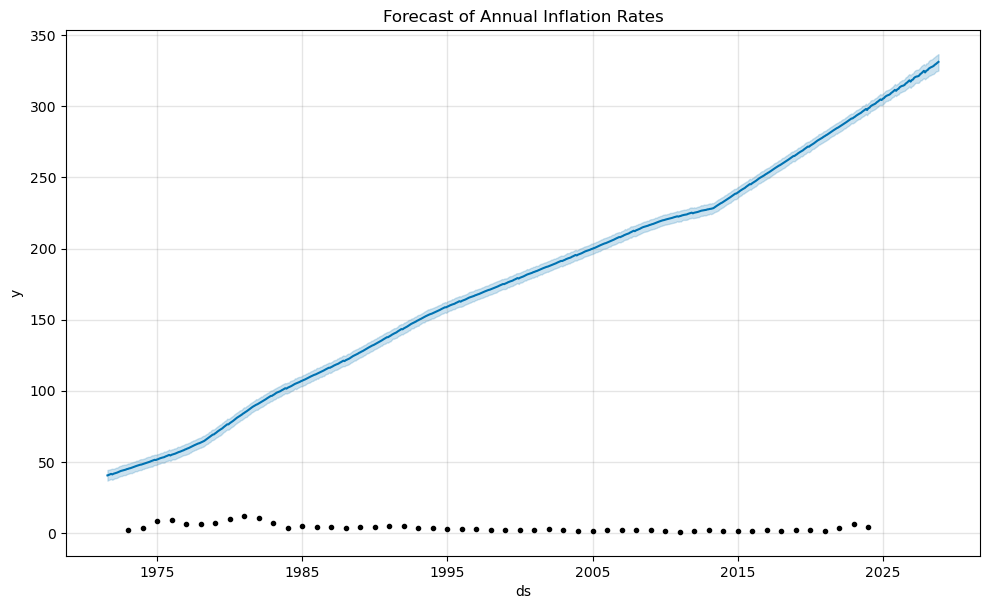

In [41]:
# Plotting the forecast
fig = inflation_model.plot(forecast)
plt.title('Forecast of Annual Inflation Rates')
plt.show()

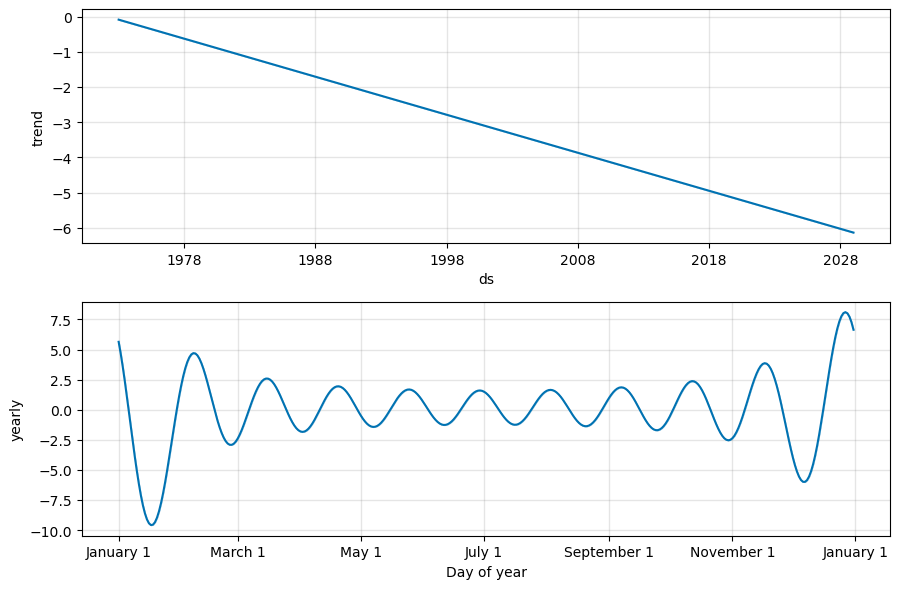

In [44]:
# Optionally, plot the forecast components
inflation_model.plot_components(inflation_forecast)
plt.show()

## Extract the Cleansed Data into a CSV

In [20]:
# Code to export the cleansed data to a CSV file
# Example: dollar_value_df_prophet.to_csv('cleansed_dollar_value.csv', index=False)